<a href="https://colab.research.google.com/github/viswas04/CODSOFT-PROJECTS/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task-2
###sales prediction  by using machine learning in Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)


#Loading the  sales dataset

In [2]:
df = pd.read_csv('/content/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#checking for outier with  visualization

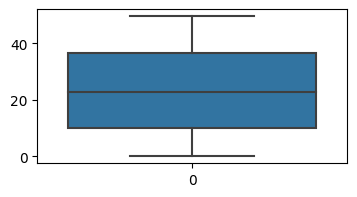

In [8]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Radio'])
plt.show()

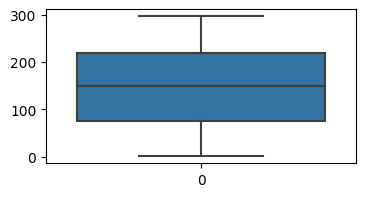

In [9]:
plt.figure(figsize = (4,2))
sns.boxplot(df['TV'])
plt.show()

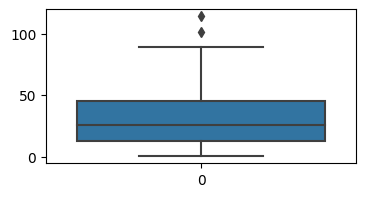

In [10]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Newspaper'])
plt.show()

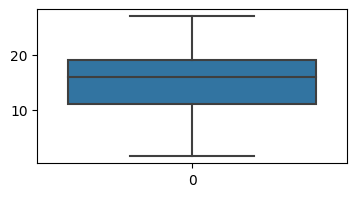

In [11]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Sales'])
plt.show()

##In above graph , there is no outlier expect "newspaper"

In [12]:
IQR = df.Newspaper.quantile(0.75)  - df.Newspaper.quantile(0.25)
min_value = df['Newspaper'].quantile(0.25) - (IQR*1.5)
max_value =df['Newspaper'].quantile(0.75) - (IQR*1.5)
print(min_value , "\n", max_value)

-35.775000000000006 
 -3.4250000000000043


In [13]:
df = df.copy()

In [14]:
df.loc[df['Newspaper']>93 , 'Newspaper'] = 93

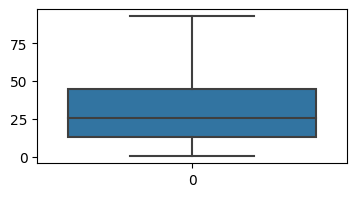

In [15]:
plt.figure(figsize=(4,2))
sns.boxplot(df['Newspaper'])
plt.show()

#Now  There is no outlier in dataset

<Axes: >

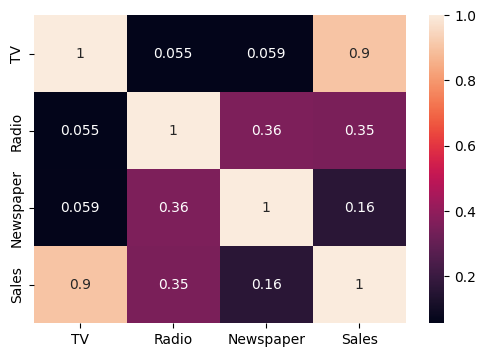

In [16]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot =True)

###All data set is numeric form now , we can train the model now

#Target Variable and feature

In [17]:
# Create matrix of features
x = df.drop('Sales', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = df['Sales'] # y is the column we're trying to predict


In [18]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

###Model Training

In [19]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .33)

In [20]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [21]:
x_train.shape

(134, 3)

In [22]:
x_test.shape

(66, 3)

In [23]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [24]:
y_train.shape

(134,)

In [25]:

# Import model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe.fit(x_train, y_train)

LinearRegression()

#model predictions

In [26]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(66,)
[16.33647717 12.23027148 12.67406021 11.13888543 16.45847211  8.35604988
  9.74276622 21.97561075 16.82717915 12.95804796 18.22621917 12.31143121
  9.40300996 19.47829193  7.2256113  17.0870807  10.46687529 10.98335261
 16.5772016   8.14237174  9.26295572 16.69763952 13.75923411  9.21904018
  7.44373845 18.85569993 21.05135338 15.97037188 21.04925902 12.4921707
 18.74095417  8.63311708 21.09533929 20.71375573  9.25774221 20.36173841
 15.83152499 12.1717941  21.219355   14.72769803 24.89945393 21.2109686
 19.49417636 19.31224152 12.49969335 12.27415703 23.52046485 14.23630665
 12.32435556 13.12476798 11.66385307 21.65145462 10.61441383 11.28567935
 13.38250379 13.15547545  6.0752417  20.07473291  7.81070096  9.91866612
 18.47105666 22.20364263 19.34248497  7.88301413 18.16255471 15.8486842 ]


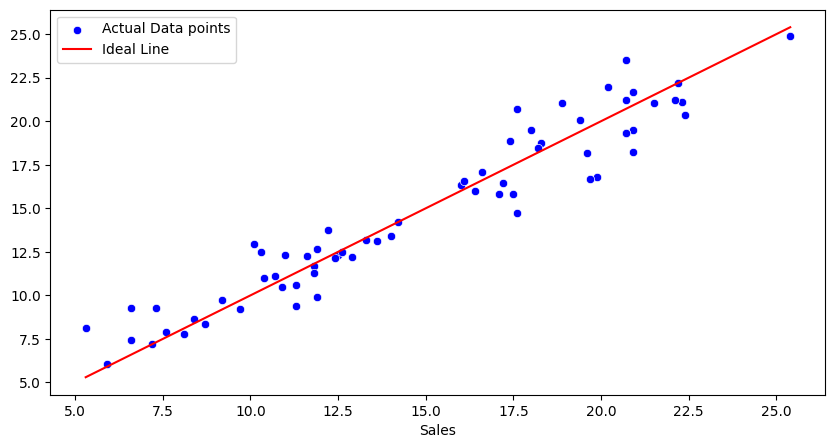

In [27]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [28]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))


# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
         16.00 |         16.34
         12.90 |         12.23
         11.90 |         12.67
         10.70 |         11.14
         17.20 |         16.46
          8.70 |          8.36
          9.20 |          9.74
         20.20 |         21.98
         19.90 |         16.83
         10.10 |         12.96
         20.90 |         18.23
         12.50 |         12.31
         11.30 |          9.40
         20.90 |         19.48
          7.20 |          7.23
         16.60 |         17.09
         10.90 |         10.47
         10.40 |         10.98
         16.10 |         16.58
          5.30 |          8.14
          6.60 |          9.26
         19.70 |         16.70
         12.20 |         13.76
          9.70 |          9.22
          6.60 |          7.44
         17.40 |         18.86
         21.50 |         21.05
         16.40 |         15.97
         18.90 |         21.05
         10.30 |         12.49
     

## **Residual Analysis**
Residual analysis in linear regression is a way to check how well the model fits the data. It involves looking at the differences (residuals) between the actual data points and the predictions from the model.


In [29]:
residual = actual- y_pred.reshape(-1)
print(residual)

[ 1.16352283  5.26972852  4.82593979  6.36111457  1.04152789  9.14395012
  7.75723378 -4.47561075  0.67282085  4.54195204 -0.72621917  5.18856879
  8.09699004 -1.97829193 10.2743887   0.4129193   7.03312471  6.51664739
  0.9227984   9.35762826  8.23704428  0.80236048  3.74076589  8.28095982
 10.05626155 -1.35569993 -3.55135338  1.52962812 -3.54925902  5.0078293
 -1.24095417  8.86688292 -3.59533929 -3.21375573  8.24225779 -2.86173841
  1.66847501  5.3282059  -3.719355    2.77230197 -7.39945393 -3.7109686
 -1.99417636 -1.81224152  5.00030665  5.22584297 -6.02046485  3.26369335
  5.17564444  4.37523202  5.83614693 -4.15145462  6.88558617  6.21432065
  4.11749621  4.34452455 11.4247583  -2.57473291  9.68929904  7.58133388
 -0.97105666 -4.70364263 -1.84248497  9.61698587 -0.66255471  1.6513158 ]


<Axes: ylabel='Density'>

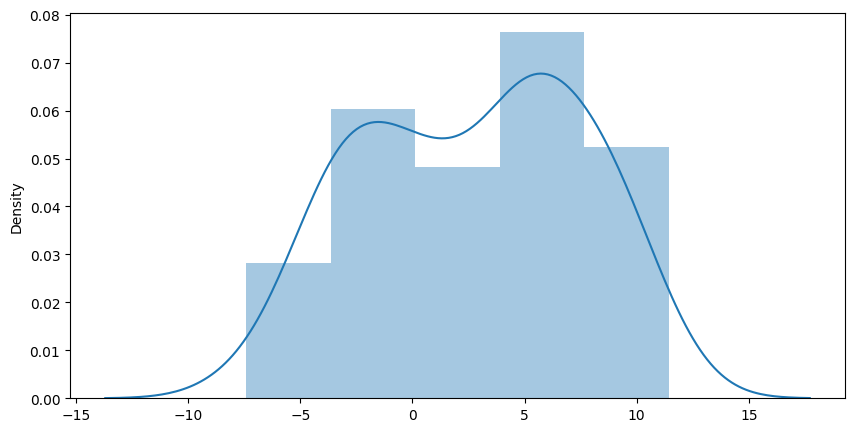

In [30]:
# Distribution plot for Residual (difference between actual and predicted values)
sns.distplot(residual, kde=True)

#Mean Squared error

In [31]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)

#measure r2_score
r2 =r2_score(y_test, y_pred)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("R2_score:" , r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
R2_score: 0.9214630547236555
Mean Squared Error: 2.0384116303740765
Root Mean Squared Error: 1.4277295368430523


#Descion Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

r2_dt =r2_score(y_test, y_pred)
DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print("r2_score: ", r2_dt)
print('Decision Tree Regression: ',DTr)

r2_score:  0.9214630547236555
Decision Tree Regression:  3.122878787878787


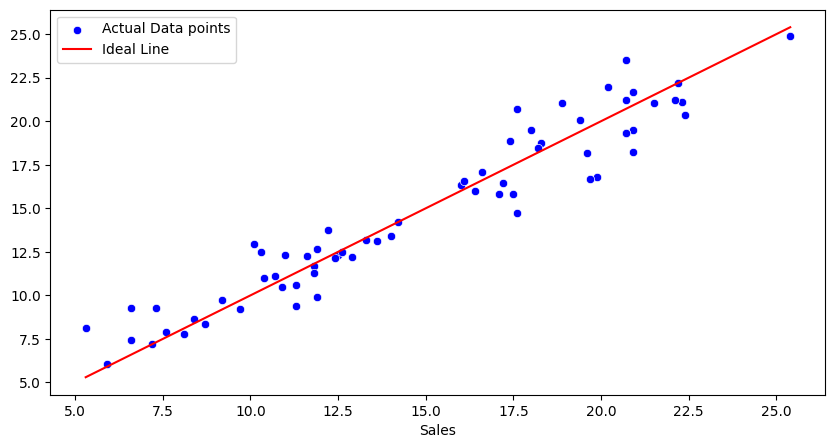

In [33]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()